<a href="https://colab.research.google.com/github/Tony-TTran/Tony-TTran/blob/main/Amazon_Sentiment_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk




#**Loading in Data Set**
  

In [ ]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Sets/Reviews.csv', on_bad_lines='skip', engine="python",delim_whitespace=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Downsizing the Size of the Data set
print(df.shape)
df = df.head(1000)
print(df.shape)


(236991, 1)
(1000, 1)


In [ ]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Quick EDA**

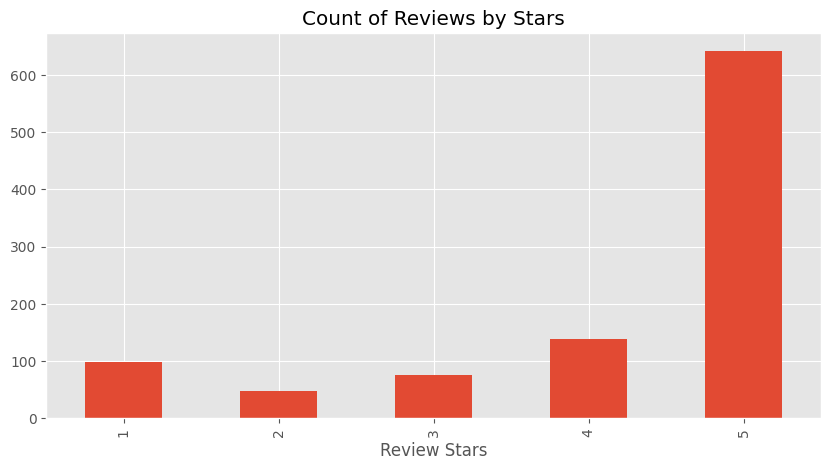

In [ ]:
# Most product reviews are rated 5
ax = df['Score'].value_counts().sort_index() \
      .plot(kind = 'bar',
            title = 'Count of Reviews by Stars',
            figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

#**VADER SENIMENT SCORING**



In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#For each customer, determine the sentiment of their review and store into a dictionary
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  review = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(review)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
#Given the new dataframe with the sentiment score, merge it with the original data from
df2 = pd.DataFrame(res).T
df2 = df2.reset_index().rename(columns={'index' : 'Id'})
df2 = df2.merge(df, how = 'left')
df2

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

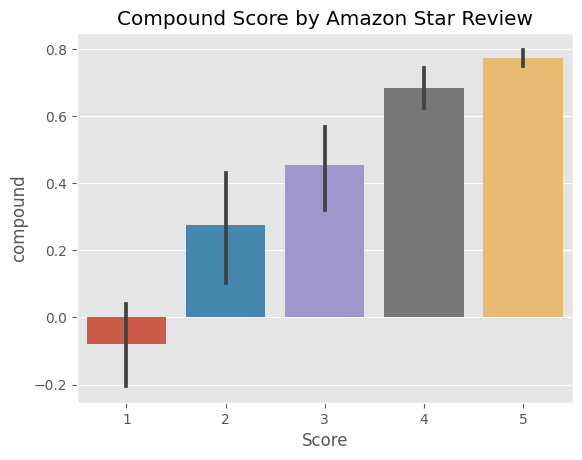

In [ ]:
ax = sns.barplot(data=df2, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

Text(0.5, 1.0, 'Neutral')

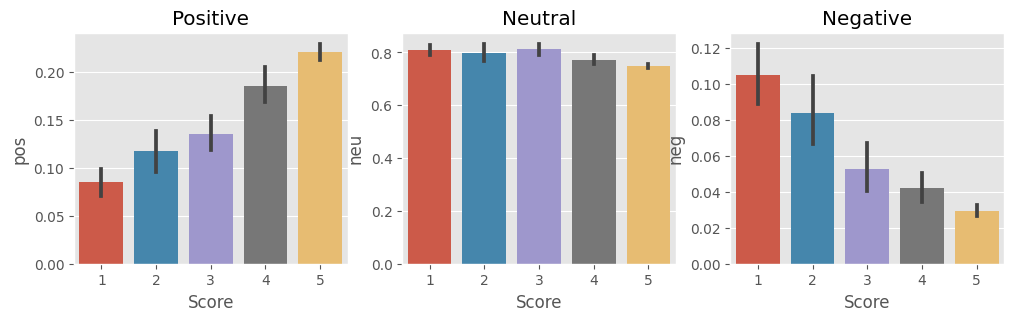

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=df2, x='Score', y='pos', ax =axs[0])
sns.barplot(data=df2, x='Score', y='neu', ax =axs[1])
sns.barplot(data=df2, x='Score', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[2].set_title('Negative')
axs[1].set_title('Neutral')